<a href="https://colab.research.google.com/github/Swetha-18/Exploratory-Data-Analysis-EDA-using-Numpy-and-Pandas-casestudy/blob/main/Exploratory_Data_Analysis_(EDA)_using_Numpy_and_Pandas_Swetha_bonkuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Loading the Dataset:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
# Step 2: Load the dataset from a CSV file.
df_ecommerce_data = pd.read_csv("/content/ecommerce.csv")

In [ ]:
# Step 3: Explore the dataset
# Display the first few rows of the dataset
df_ecommerce_data

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan
2,3.0,31.0,Product E,Automobile,5891.07,99.0,3/29/2022,Brazil
3,4.0,40.0,Product H,Clothing,2765.73,83.0,11/7/2022,China
4,5.0,17.0,Product B,Automobile,4594.39,17.0,12/29/2021,Colombia
...,...,...,...,...,...,...,...,...
995,996.0,18.0,Product F,Kitchen,4288.75,36.0,3/17/2022,China
996,NaN,9.0,Product B,Electronics,2240.62,67.0,3/19/2020,Colombia
997,998.0,48.0,Product G,Accessories,4649.53,1.0,9/18/2022,NaN
998,NaN,50.0,Product B,Kitchen,9547.98,56.0,12/5/2020,Pakistan


In [ ]:
# **2. Data Cleaning:**
df_ecommerce_data.head()

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan
2,3.0,31.0,Product E,Automobile,5891.07,99.0,3/29/2022,Brazil
3,4.0,40.0,Product H,Clothing,2765.73,83.0,11/7/2022,China
4,5.0,17.0,Product B,Automobile,4594.39,17.0,12/29/2021,Colombia


In [ ]:
# Get basic information about the dataset, including data types and missing values
print(df_ecommerce_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     882 non-null    float64
 1   Customer_ID  947 non-null    float64
 2   Product      1000 non-null   object 
 3   Category     1000 non-null   object 
 4   Price        875 non-null    float64
 5   Quantity     962 non-null    float64
 6   Order_Date   1000 non-null   object 
 7   Country      910 non-null    object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB
None


In [ ]:
# Check for missing values,
df_ecommerce_data.isnull().sum()

Order_ID       118
Customer_ID     53
Product          0
Category         0
Price          125
Quantity        38
Order_Date       0
Country         90
dtype: int64

In [ ]:
# Check for duplicated rows
duplicated_rows = [df_ecommerce_data.duplicated()]
duplicated_rows

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 995    False
 996    False
 997    False
 998    False
 999    False
 Length: 1000, dtype: bool]

In [ ]:
# Remove duplicated rows
df =df_ecommerce_data.drop_duplicates(inplace=True)

In [ ]:
column_names = df_ecommerce_data.columns
column_names

Index(['Order_ID', 'Customer_ID', 'Product', 'Category', 'Price', 'Quantity',
       'Order_Date', 'Country'],
      dtype='object')

In [ ]:
# Check for duplicate rows
df_ecommerce_data.duplicated().sum()

0

In [ ]:

# Handle any issues found
df_ecommerce_data.dropna(inplace=True)
df_ecommerce_data.drop_duplicates(inplace=True)

In [ ]:
# Check for inconsistent data
df_ecommerce_data["Price"].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1      4477.63
2      5891.07
3      2765.73
4      4594.39
        ...   
995    4288.75
996    2240.62
997    4649.53
998    9547.98
999        NaN
Name: Price, Length: 1000, dtype: float64>

In [ ]:
# **3. Data Summary:**
# Calculate and display the following summary statistics:
# Total number of orders.
df_ecommerce_data["Order_ID"].count()

882

In [ ]:
# Total number of customers.
df_ecommerce_data["Customer_ID"].nunique()

50

In [ ]:
# Total revenue generated.
# Calculate total revenue for each order and add it as a new column
df_ecommerce_data['Total_Revenue'] = df_ecommerce_data['Price'] * df_ecommerce_data['Quantity']

# Calculate the sum of total revenue to get the total revenue generated
total_revenue = df_ecommerce_data['Total_Revenue'].sum()

print("Total Revenue Generated:", total_revenue)


Total Revenue Generated: 212179302.9


In [ ]:
# - Average order value.
# Calculate the total number of orders
total_orders = df_ecommerce_data['Order_ID'].nunique()

# Calculate the average order value
average_order_value = total_revenue / total_orders

print("Average Order Value:", average_order_value)


Average Order Value: 240566.1030612245


In [ ]:
# **4. Category Analysis:**
# Explore the distribution of products across different categories. Provide percentage sales of each category
category_counts = df_ecommerce_data['Category'].value_counts()


In [ ]:
category_counts

Clothing       218
Kitchen        206
Electronics    199
Automobile     189
Accessories    188
Name: Category, dtype: int64

In [ ]:
category_percentage_sales = (category_counts/total_orders) * 100


In [ ]:
#  percentage sales of each category
print("Percentage sales of each category:")
print(category_percentage_sales)

Percentage sales of each category:
Clothing       24.716553
Kitchen        23.356009
Electronics    22.562358
Automobile     21.428571
Accessories    21.315193
Name: Category, dtype: float64


In [ ]:
df_ecommerce_data['Category'].value_counts(normalize=True) * 100

Clothing       21.651090
Kitchen        21.495327
Electronics    19.314642
Accessories    19.158879
Automobile     18.380062
Name: Category, dtype: float64

In [ ]:
# **5. Country-wise Analysis:**
# Identify the top 5 countries with the highest number of orders. Create a bar plot to visualize this information.
df_ecommerce_data['Country'].value_counts().head(5)

China          133
Indonesia       71
Russia          38
Philippines     27
Brazil          22
Name: Country, dtype: int64

In [ ]:
# or
top_countries = df_ecommerce_data['Country'].value_counts().head(5)

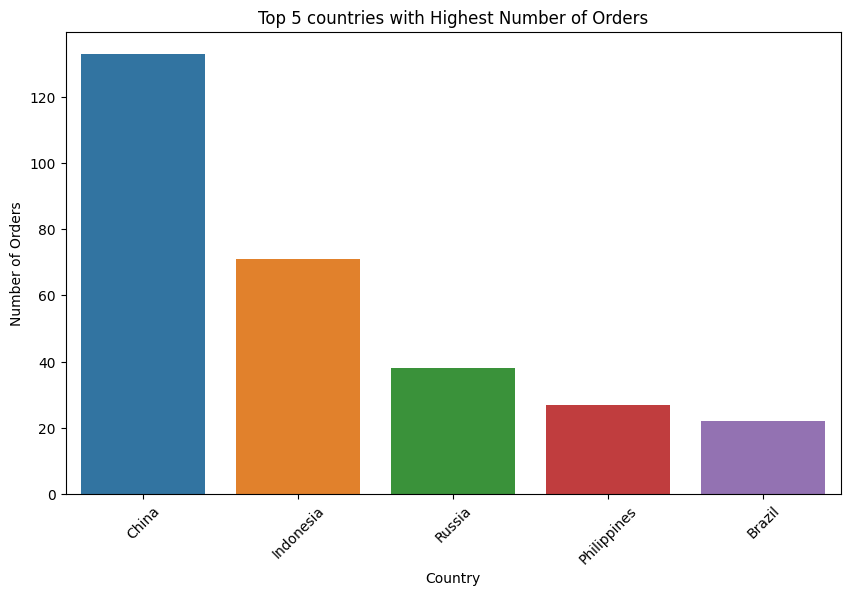

In [ ]:
# # Create a bar plot to visualize this information
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.title("Top 5 countries with Highest Number of Orders")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# **6. Monthly Analysis:**
# Show the monthly revenue over the entire dataset's time period.
df_ecommerce_data['Order_Date']=pd.to_datetime(df_ecommerce_data['Order_Date'])


In [ ]:
# # Extract the month from 'Order_Date' and calculate monthly revenue
# Extract the month from 'Order_Date' and calculate monthly revenue
# Calculate the total cost of each order
df_ecommerce_data['Total'] = df_ecommerce_data['Price'] * df_ecommerce_data['Quantity']

In [ ]:
monthly_revenue = df_ecommerce_data.groupby(df_ecommerce_data['Order_Date'].dt.strftime('%Y-%m'))['Total'].sum()


In [ ]:
# Extract the month from 'Order_Date' and calculate monthly revenue
monthly_revenue = df_ecommerce_data.groupby(df_ecommerce_data['Order_Date'].dt.strftime('%Y-%m'))['Total'].sum()

# Display the monthly revenue
print(monthly_revenue)


Order_Date
2020-01    4312584.45
2020-02    1975933.76
2020-03    7415310.69
2020-04    4257153.30
2020-05    2211993.71
2020-06    4350826.83
2020-07    4247457.30
2020-08    5425036.50
2020-09    3422201.44
2020-10    4994923.54
2020-11    3811368.42
2020-12    4877434.67
2021-01    6003994.91
2021-02    3625356.78
2021-03    3366710.61
2021-04    1622368.03
2021-05    7387847.34
2021-06    4540865.38
2021-07    4191597.96
2021-08    3432769.26
2021-09    1948403.69
2021-10    2250044.33
2021-11    3402887.04
2021-12    5356230.07
2022-01    5950189.56
2022-02    3297459.21
2022-03    3644889.98
2022-04    2290372.25
2022-05    6041605.19
2022-06    6414861.64
2022-07    5917289.46
2022-08    4543919.10
2022-09    7795088.35
2022-10    3312374.25
2022-11    7614927.95
2022-12    3415460.97
Name: Total, dtype: float64


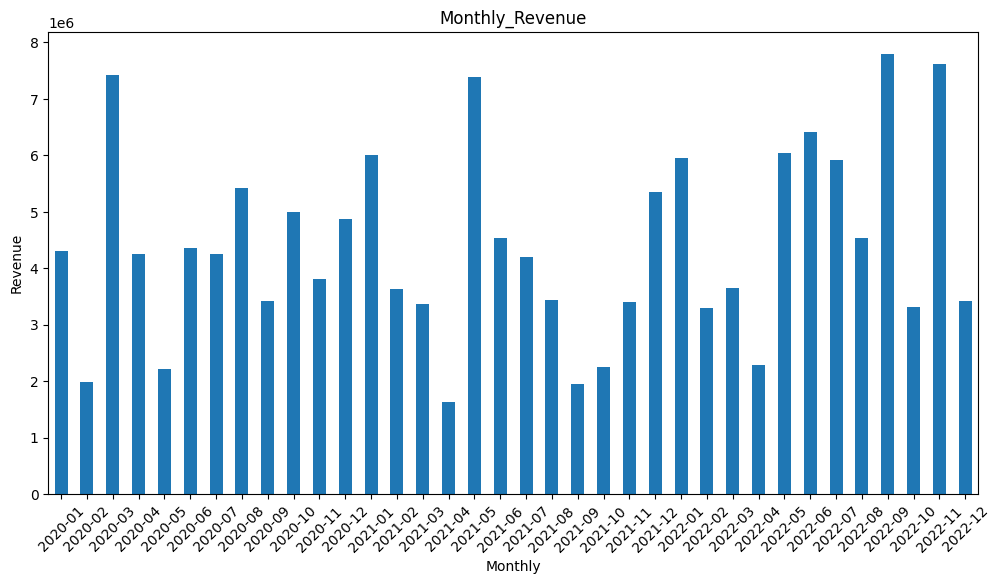

In [ ]:
#  Plot the monthly revenue
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.xlabel("Monthly")
plt.ylabel("Revenue")
plt.title("Monthly_Revenue")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# **7. Customer Insights:**
# Identify the top 5 customers who have spent the most. Display their names and total spending.
# Identify the top 5 customers who have spent the most
df_ecommerce_data.groupby('Customer_ID')['Total'].sum().sort_values(ascending=False).head(5)

Customer_ID
8.0     5690876.66
30.0    5333686.85
28.0    5080991.83
27.0    4809322.46
45.0    4721177.26
Name: Total, dtype: float64

<Axes: >

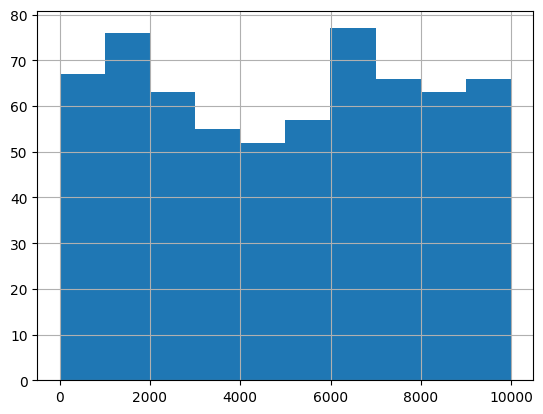

In [ ]:
# **8. Price Distribution:**
# Show the distribution of product prices between different ranges.
df_ecommerce_data['Price'].hist(bins=10)

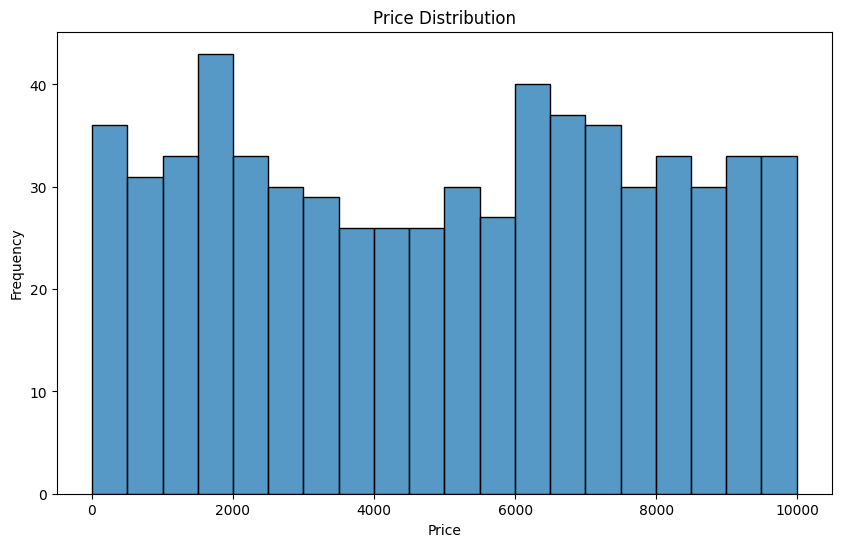

In [ ]:
#  Show the distribution of product prices between different ranges (e.g., using histograms)
plt.figure(figsize=(10, 6))
sns.histplot(df_ecommerce_data['Price'], bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()


In [ ]:
# **10. Time-based Analysis:**
# Explore how sales have evolved over time. Average sales yearly, and quaterly
df_ecommerce_data['Year']=df_ecommerce_data['Order_Date'].dt.year
df_ecommerce_data['Quarter']=df_ecommerce_data['Order_Date'].dt.quarter



In [ ]:
# Average sales yearly
yearly_sales = df_ecommerce_data.groupby('Year')['Total'].mean()

In [ ]:
# Average sales quarterly
quarterly_sales = df_ecommerce_data.groupby(['Year', 'Quarter'])['Total'].mean()

In [ ]:
# Display average sales yearly
print("Average Sales Yearly:")
print(yearly_sales)


Average Sales Yearly:
Year
2020    256511.123050
2021    220229.324299
2022    264203.675044
Name: Total, dtype: float64


In [ ]:
# Display average sales quarterly
print("\nAverage Sales Quarterly:")
print(quarterly_sales)


Average Sales Quarterly:
Year  Quarter
2020  1          279669.977551
      2          230212.209362
      3          251821.062308
      4          263148.589038
2021  1          245208.722642
      2          229679.334746
      3          212728.242444
      4          193143.183158
2022  1          222285.150862
      2          249946.425085
      3          326005.301964
      4          260777.512182
Name: Total, dtype: float64
